In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
"""In the ml, we cannot work with many datasets as it will get difficult.
We need to club all datasets into 1 dataset and work in it."""
# NOTE: whenever there is no. before \ , then we need to keep \\ in the file path to not get errors.

t = pd.read_csv("D:\python\project_2\\train_walmart.csv")   
s = pd.read_csv("D:\python\project_2\\stores.csv")
f = pd.read_csv("D:\python\project_2\\features.csv")

In [4]:
print(t.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [5]:
print(s.isnull().sum())

Store    0
Type     0
Size     0
dtype: int64


In [6]:
print(f.isnull().sum())

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [7]:
print(f.shape)

(8190, 12)


In [8]:
print(f["MarkDown1"].isnull().sum()/f.shape[0]*100)

50.76923076923077


In [10]:
print(f["MarkDown1"].isnull().sum()/f.shape[0]*100)
print(f["MarkDown2"].isnull().sum()/f.shape[0]*100)
print(f["MarkDown3"].isnull().sum()/f.shape[0]*100)
print(f["MarkDown4"].isnull().sum()/f.shape[0]*100)
print(f["MarkDown5"].isnull().sum()/f.shape[0]*100)
print(f["CPI"].isnull().sum()/f.shape[0]*100)
print(f["Unemployment"].isnull().sum()/f.shape[0]*100)

50.76923076923077
64.33455433455434
55.885225885225886
57.7045177045177
50.54945054945055
7.142857142857142
7.142857142857142


In [11]:
f.drop(["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"],axis=1,inplace=True)

In [12]:
print(f.isnull().sum())

Store             0
Date              0
Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64


In [13]:
f["CPI"].fillna(method="ffill",inplace=True)
f["Unemployment"].fillna(method="ffill",inplace=True)

In [14]:
print(f.isnull().sum())

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [4]:
f

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,193.589304,8.335,False
8186,45,2013-07-05,77.50,3.614,193.589304,8.335,False
8187,45,2013-07-12,79.37,3.614,193.589304,8.335,False
8188,45,2013-07-19,82.84,3.737,193.589304,8.335,False


In [5]:
s

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
t

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [2]:
a = pd.merge(t,s,on="Store",how="inner")

In [3]:
print(a.shape)

(421570, 7)


In [4]:
print(a.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size'], dtype='object')


In [5]:
a = a.merge(f,on=["Store","IsHoliday","Date"],how="inner")

In [6]:
print(a.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [4]:
a["Date"] = pd.to_datetime(a["Date"])

In [5]:
a

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667


In [6]:
a["Date"] = pd.to_datetime(a["Date"],errors="coerce")

In [7]:
a

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667


In [8]:
a.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
a["WEEK"] = a.Date.dt.isocalendar().week

In [10]:
a["YEAR"] = a.Date.dt.isocalendar().year

In [11]:
a

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,WEEK,YEAR
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667,43,2012


<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

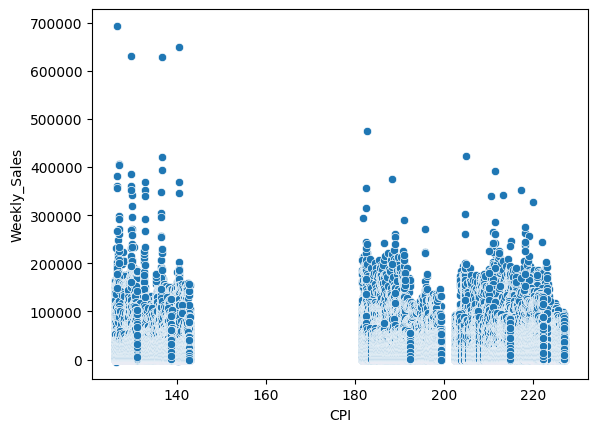

In [12]:
sns.scatterplot(x=a["CPI"],y=a["Weekly_Sales"],data=a)

In [18]:
def scattplt(x):
    sns.scatterplot(x=x,y=a["Weekly_Sales"],size=0.01,data=a)

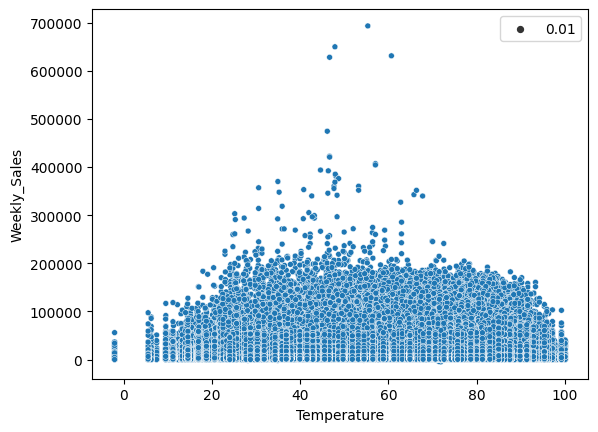

In [20]:
scattplt(a["Temperature"])

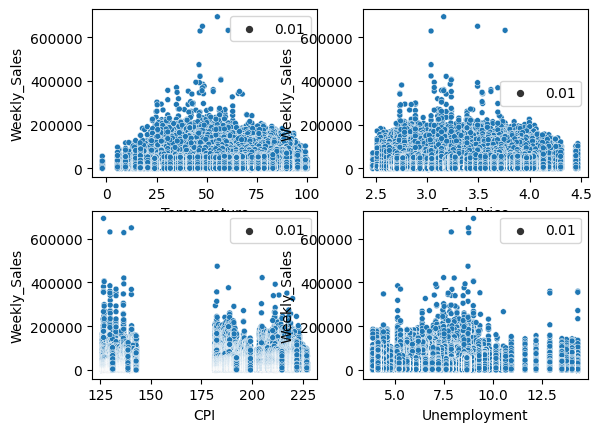

In [22]:
plt.subplot(2,2,1)
scattplt(a["Temperature"])
plt.subplot(2,2,2)
scattplt(a["Fuel_Price"])
plt.subplot(2,2,3)
scattplt(a["CPI"])
plt.subplot(2,2,4)
scattplt(a["Unemployment"])

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

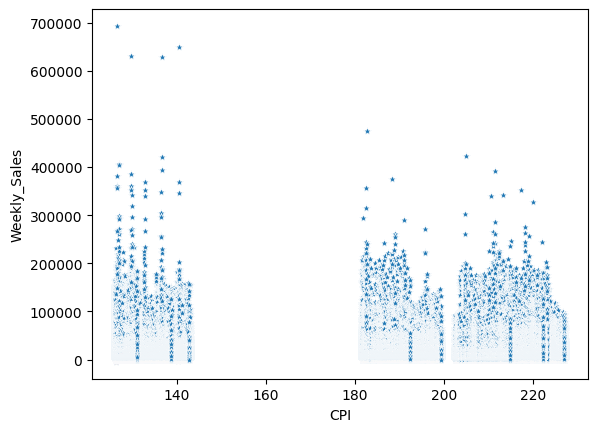

In [4]:
sns.scatterplot(x=a["CPI"],y=a["Weekly_Sales"],marker="*",data=a)

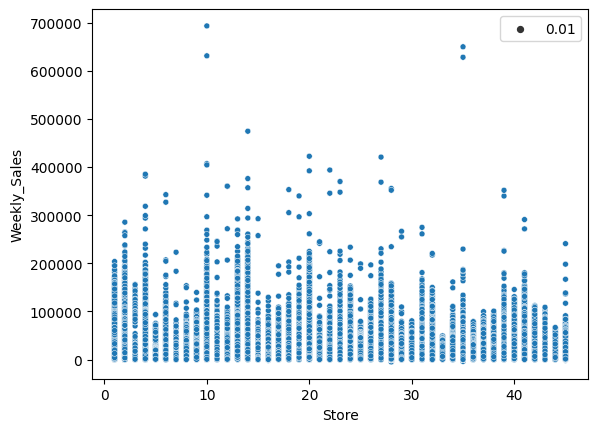

In [8]:
scattplt(a["Store"])

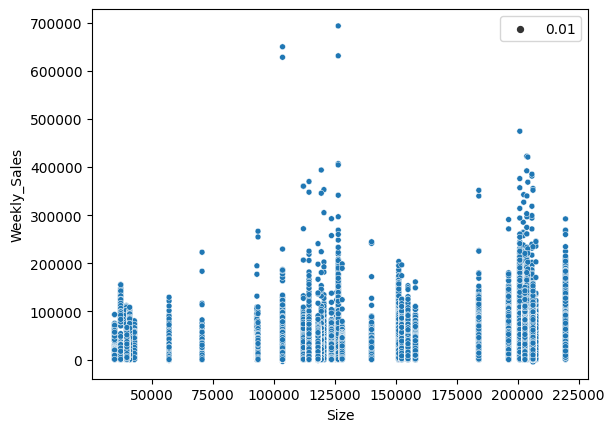

In [10]:
scattplt(a["Size"])

In [11]:
a

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,WEEK,YEAR
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667,43,2012


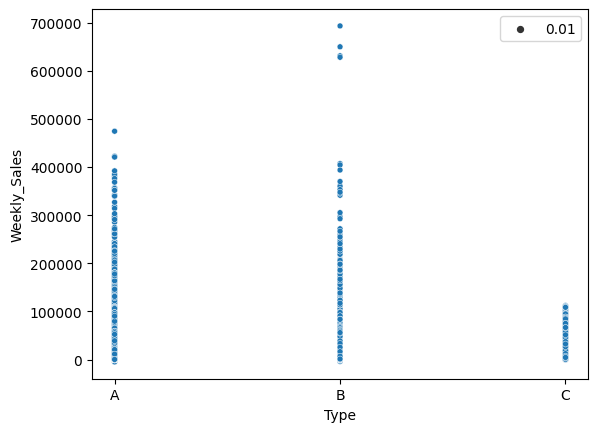

In [12]:
scattplt(a["Type"])

In [21]:
a[a["YEAR"] == 2012]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,WEEK,YEAR
7169,1,1,2012-01-06,16567.69,False,A,151315,49.01,3.157,219.714258,7.348,1,2012
7170,1,2,2012-01-06,44481.38,False,A,151315,49.01,3.157,219.714258,7.348,1,2012
7171,1,3,2012-01-06,13926.04,False,A,151315,49.01,3.157,219.714258,7.348,1,2012
7172,1,4,2012-01-06,40925.76,False,A,151315,49.01,3.157,219.714258,7.348,1,2012
7173,1,5,2012-01-06,23105.81,False,A,151315,49.01,3.157,219.714258,7.348,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667,43,2012


In [24]:
a[a["YEAR"] == 2012].groupby(a["WEEK"])["Weekly_Sales"].mean()

WEEK
1     15121.231736
2     14168.266514
3     14221.357405
4     13494.232612
5     15480.553608
6     16664.247891
7     16693.401051
8     15458.124475
9     15672.586946
10    15965.182956
11    15823.719615
12    15195.472627
13    15289.720371
14    17935.741157
15    15663.171451
16    15150.430178
17    14799.187167
18    15947.275103
19    15784.015806
20    15856.396620
21    16284.414590
22    16405.589439
23    16774.044520
24    16377.574662
25    16098.711574
26    15887.184494
27    17309.362337
28    15616.440413
29    15602.826372
30    15034.829516
31    16004.684719
32    16030.926967
33    16025.195279
34    16029.501216
35    15921.552812
36    16294.692957
37    14905.978648
38    14989.708385
39    14765.327279
40    15983.413747
41    15427.596739
42    15295.732397
43    15391.725681
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='WEEK'>

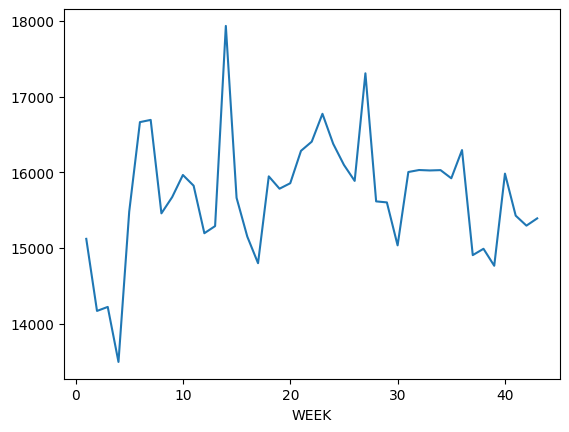

In [28]:
a[a["YEAR"] == 2012].groupby(["WEEK"])["Weekly_Sales"].mean().plot(kind="line")

In [31]:
def yearplt(p):
    a[a["YEAR"] == p].groupby(a["WEEK"])["Weekly_Sales"].mean().plot(kind="line")

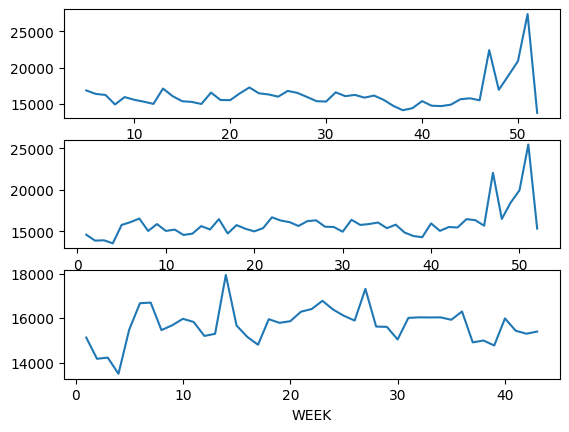

In [32]:
plt.subplot(3,1,1)
yearplt(2010)
plt.subplot(3,1,2)
yearplt(2011)
plt.subplot(3,1,3)
yearplt(2012)

Text(0.5, 1.0, '2012 YEAR')

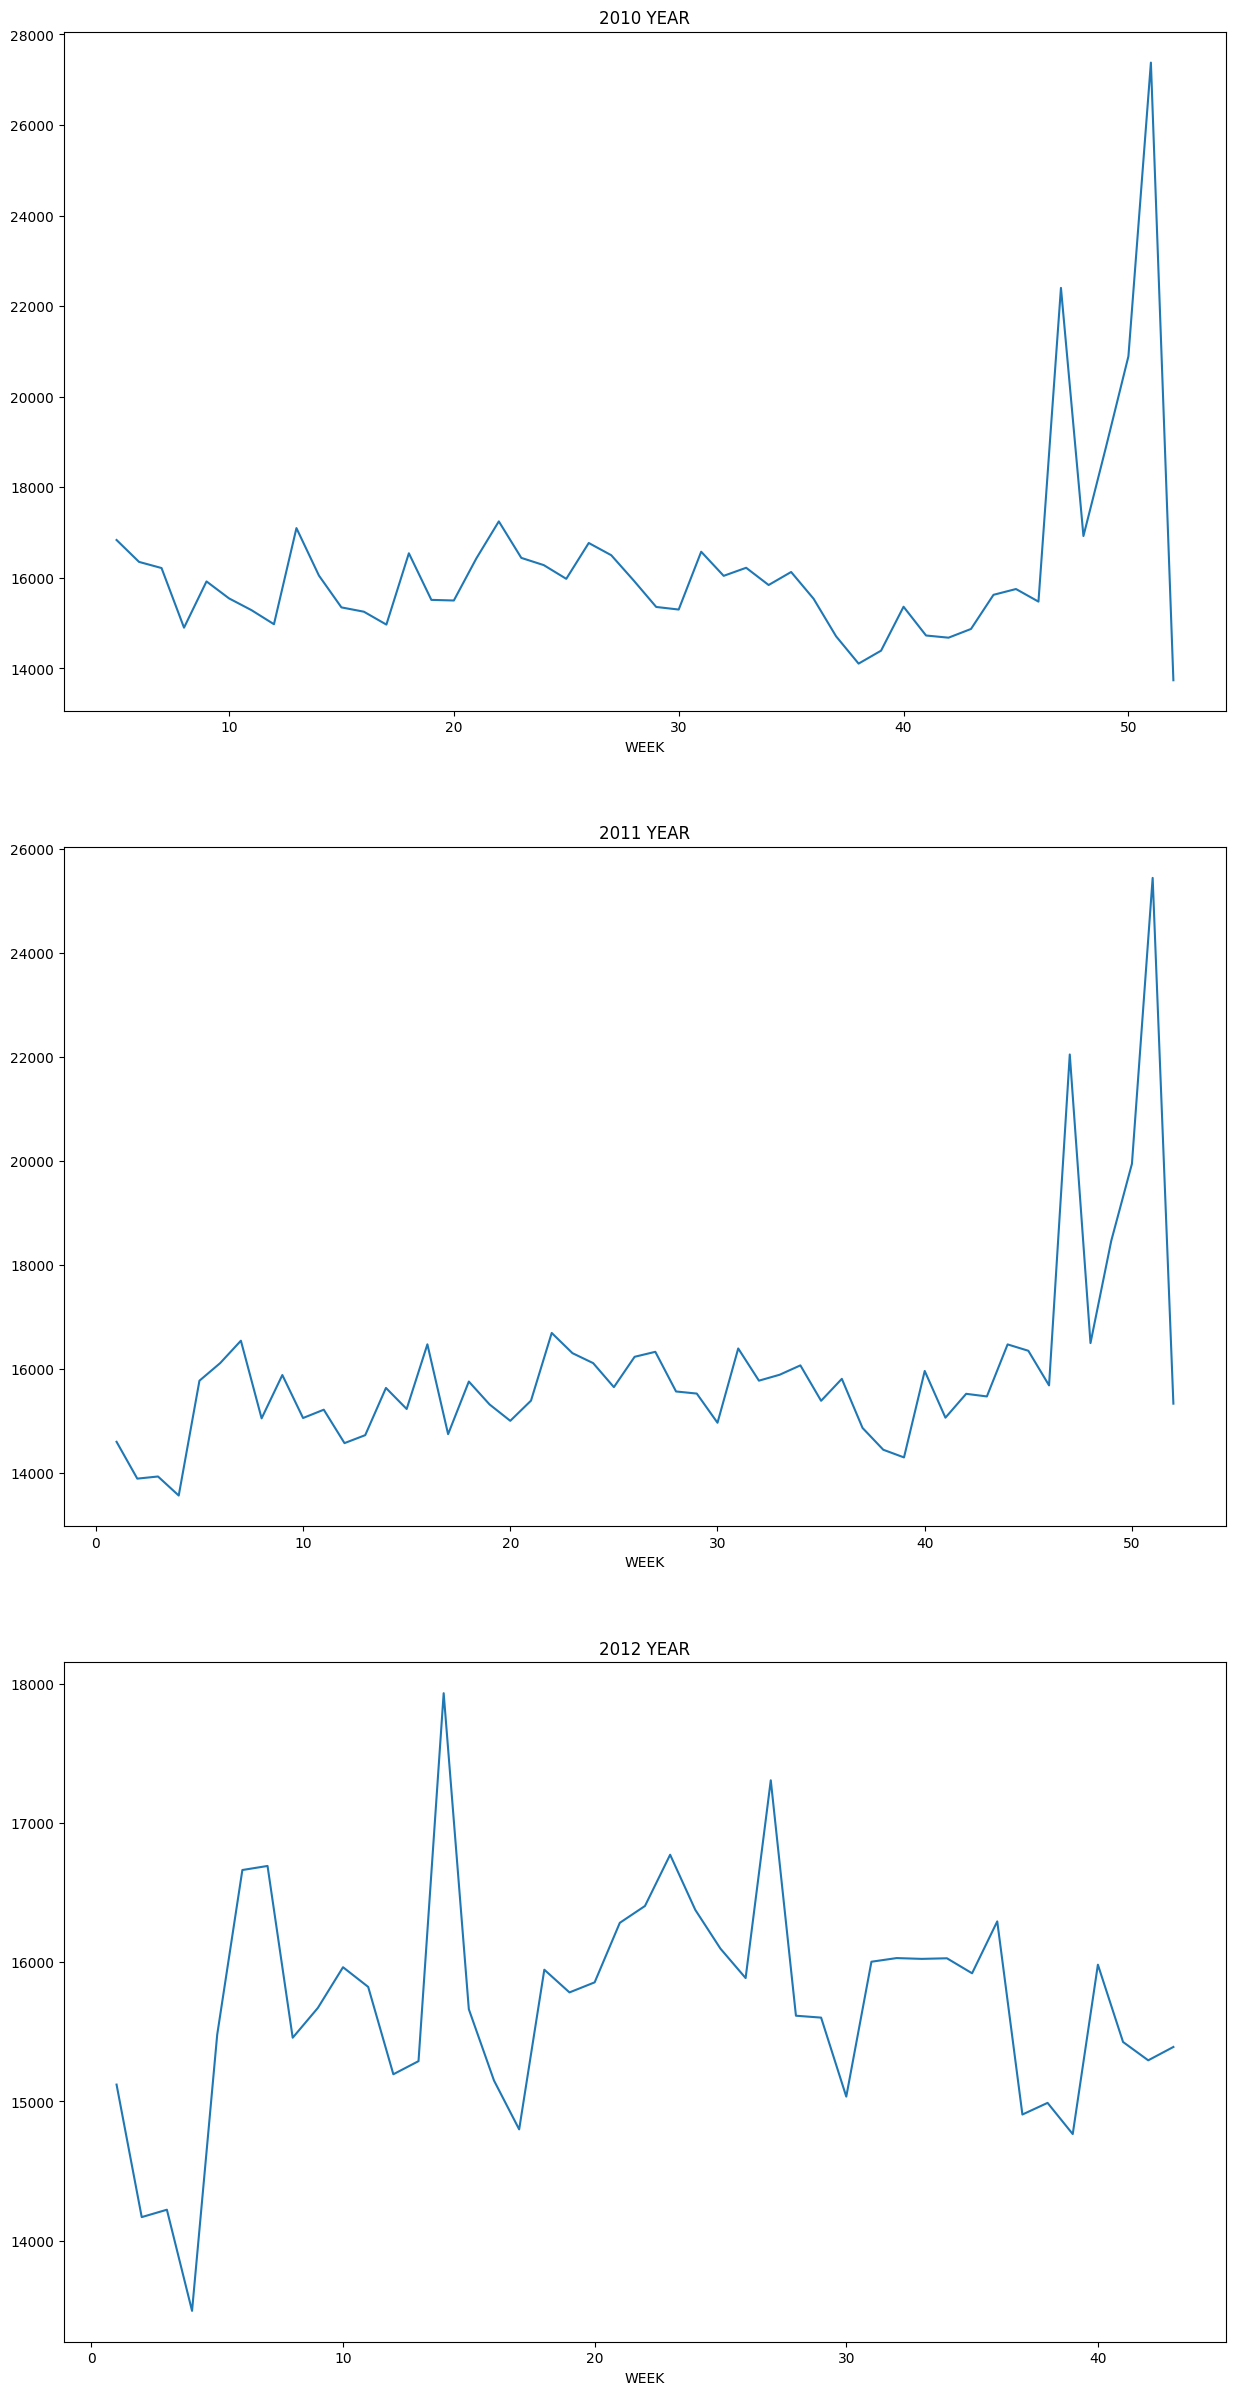

In [36]:
plt.figure(figsize=(15,30))    
plt.subplot(3,1,1)
yearplt(2010)
plt.title("2010 YEAR")
plt.subplot(3,1,2)
yearplt(2011)
plt.title("2011 YEAR")
plt.subplot(3,1,3)
yearplt(2012)
plt.title("2012 YEAR")

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

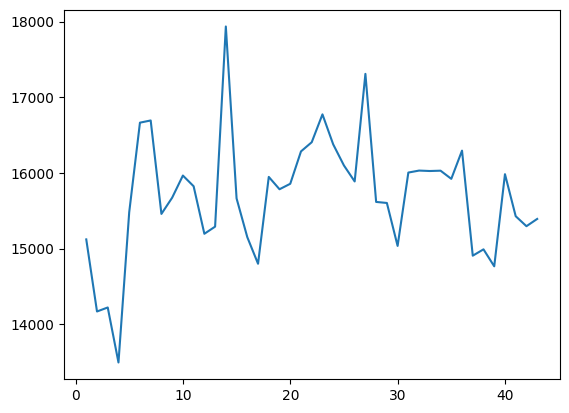

In [37]:
sns.lineplot(x=a[a["YEAR"] == 2012].groupby(["WEEK"])["Weekly_Sales"].mean().index,y=a[a["YEAR"] == 2012].groupby(a["WEEK"])["Weekly_Sales"].mean().values)

In [7]:
print(a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  WEEK          421570 non-null  UInt32        
 12  YEAR          421570 non-null  UInt32        
dtypes: UInt32(2), bool(1), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 36.6+ MB
None


In [8]:
print(a.describe())

               Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375360   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales           Size    Temperature     Fuel_Price  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123  136727.915739      60.090059       3.361027   
min     -4988.940000   34875.000000      -2.060000       2.472000   
25%      2079.650000   93638.000000      46.680000       2.933000   
50%      7612.030000  14

In [9]:
a["WEEK"] = a["WEEK"].astype(float)
a["YEAR"] = a["YEAR"].astype(float)

In [10]:
print(a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  WEEK          421570 non-null  float64       
 12  YEAR          421570 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 39.0+ MB
None


<Axes: xlabel='WEEK'>

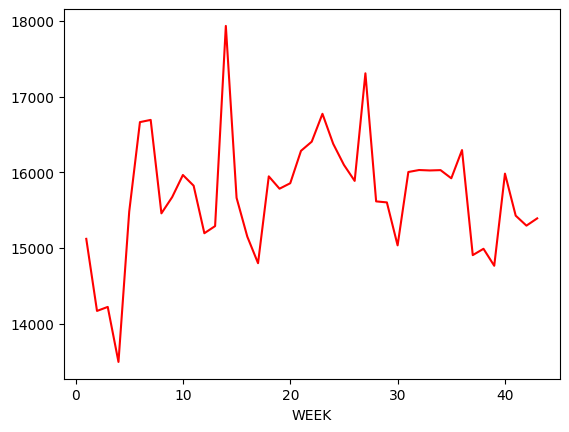

In [11]:
sns.lineplot(x=a[a["YEAR"] == 2012].groupby(["WEEK"])["Weekly_Sales"].mean().index,y=a[a["YEAR"] == 2012].groupby(a["WEEK"])["Weekly_Sales"].mean().values,color="red")

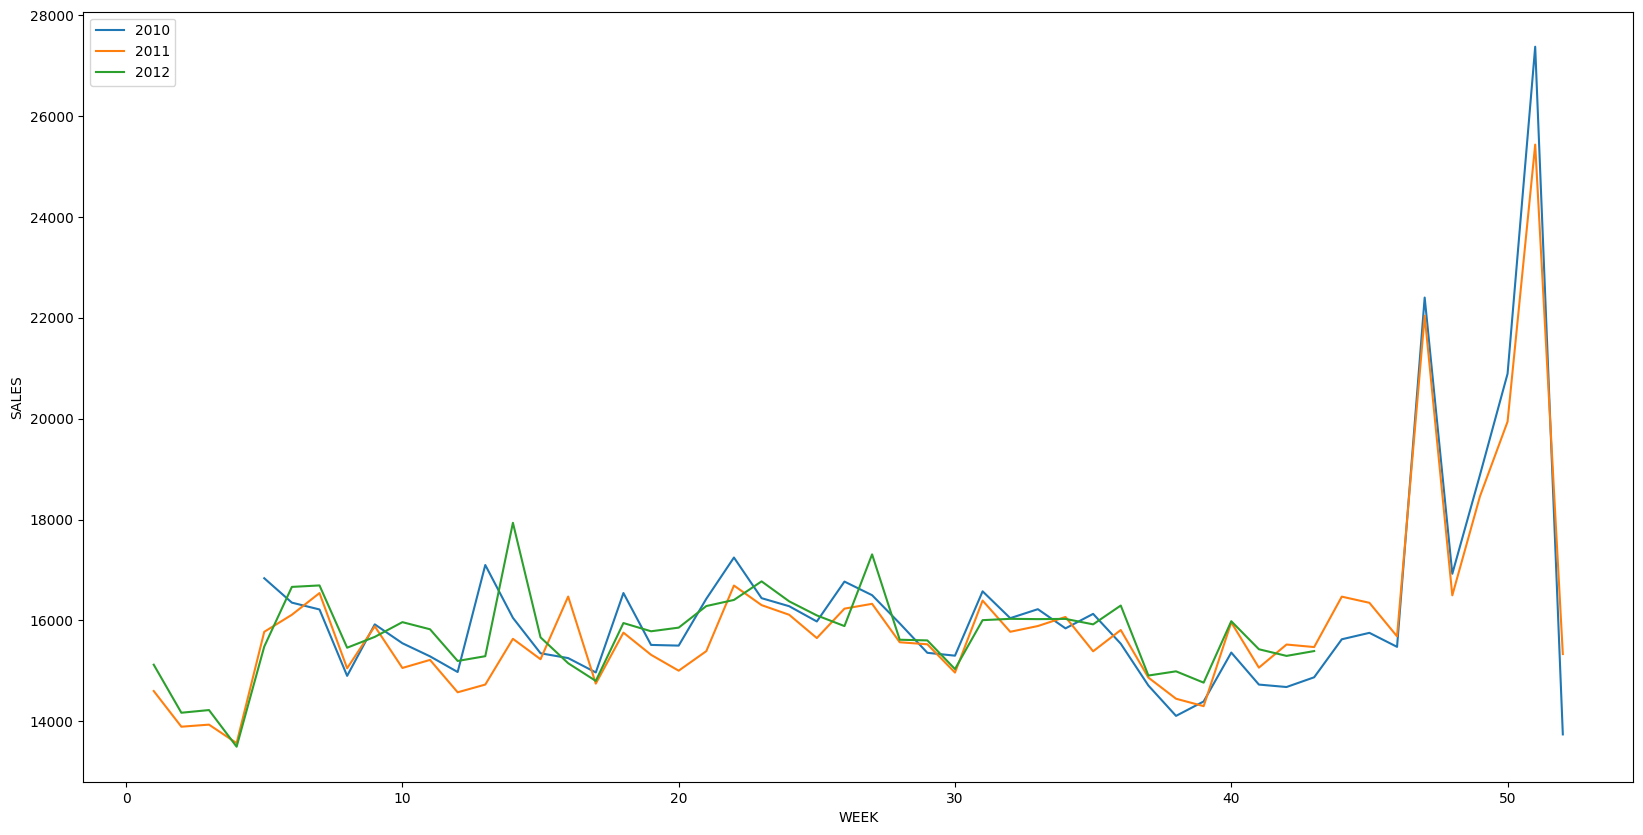

In [17]:
plt.figure(figsize=(20,10))
yearplt(2010)
yearplt(2011)
yearplt(2012)
plt.xlabel("WEEK")
plt.ylabel("SALES")
plt.legend([2010,2011,2012],loc="upper left")              # shows which color_line are which years

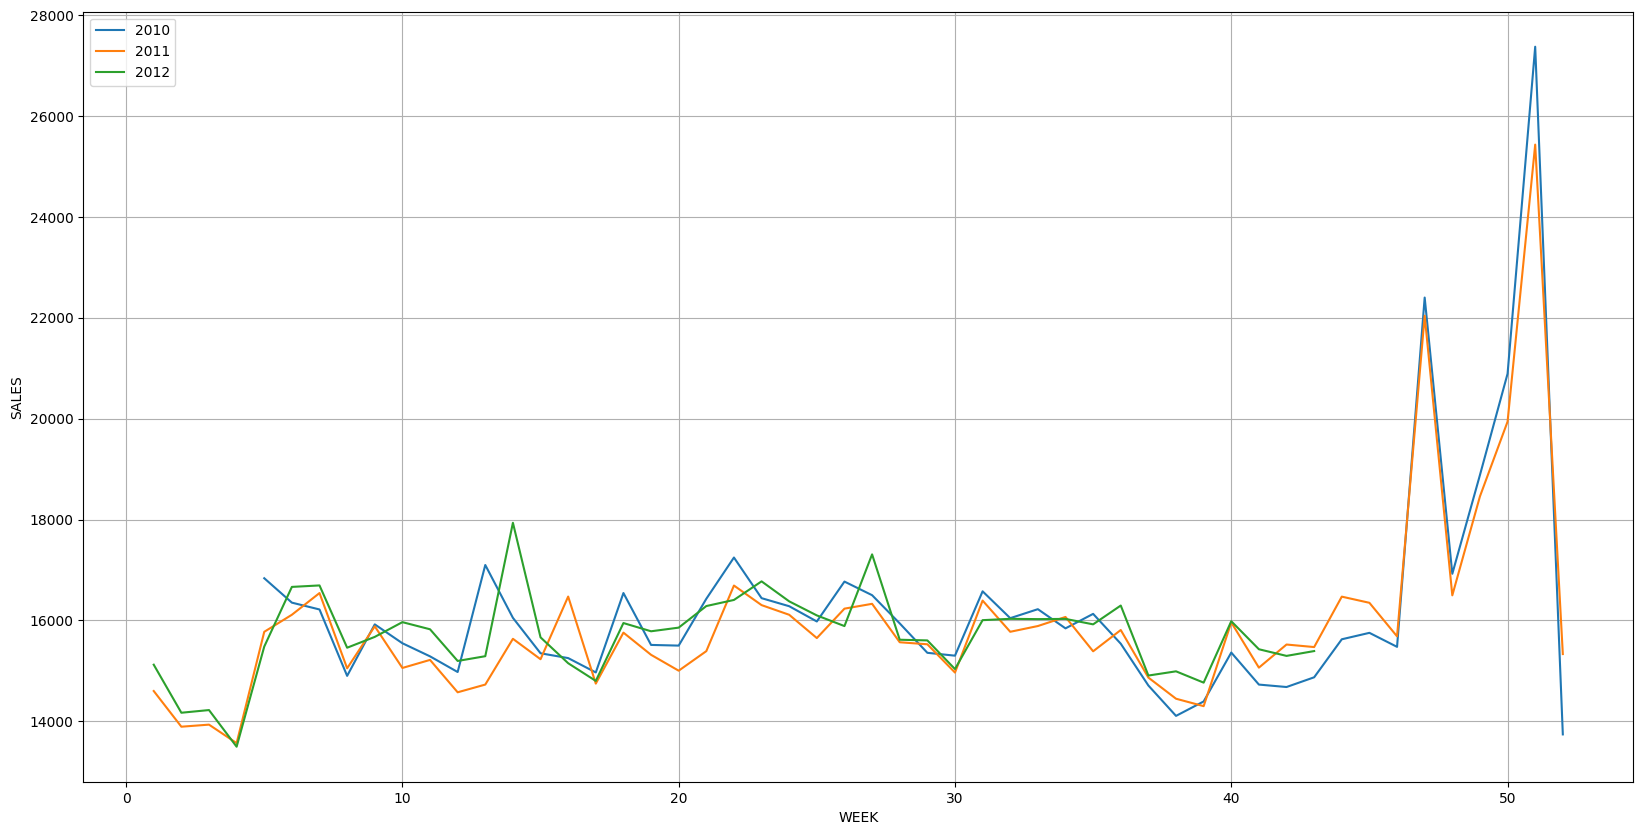

In [18]:
plt.figure(figsize=(20,10))
yearplt(2010)
yearplt(2011)
yearplt(2012)
plt.xlabel("WEEK")
plt.ylabel("SALES")
plt.grid()
plt.legend([2010,2011,2012],loc="upper left")   

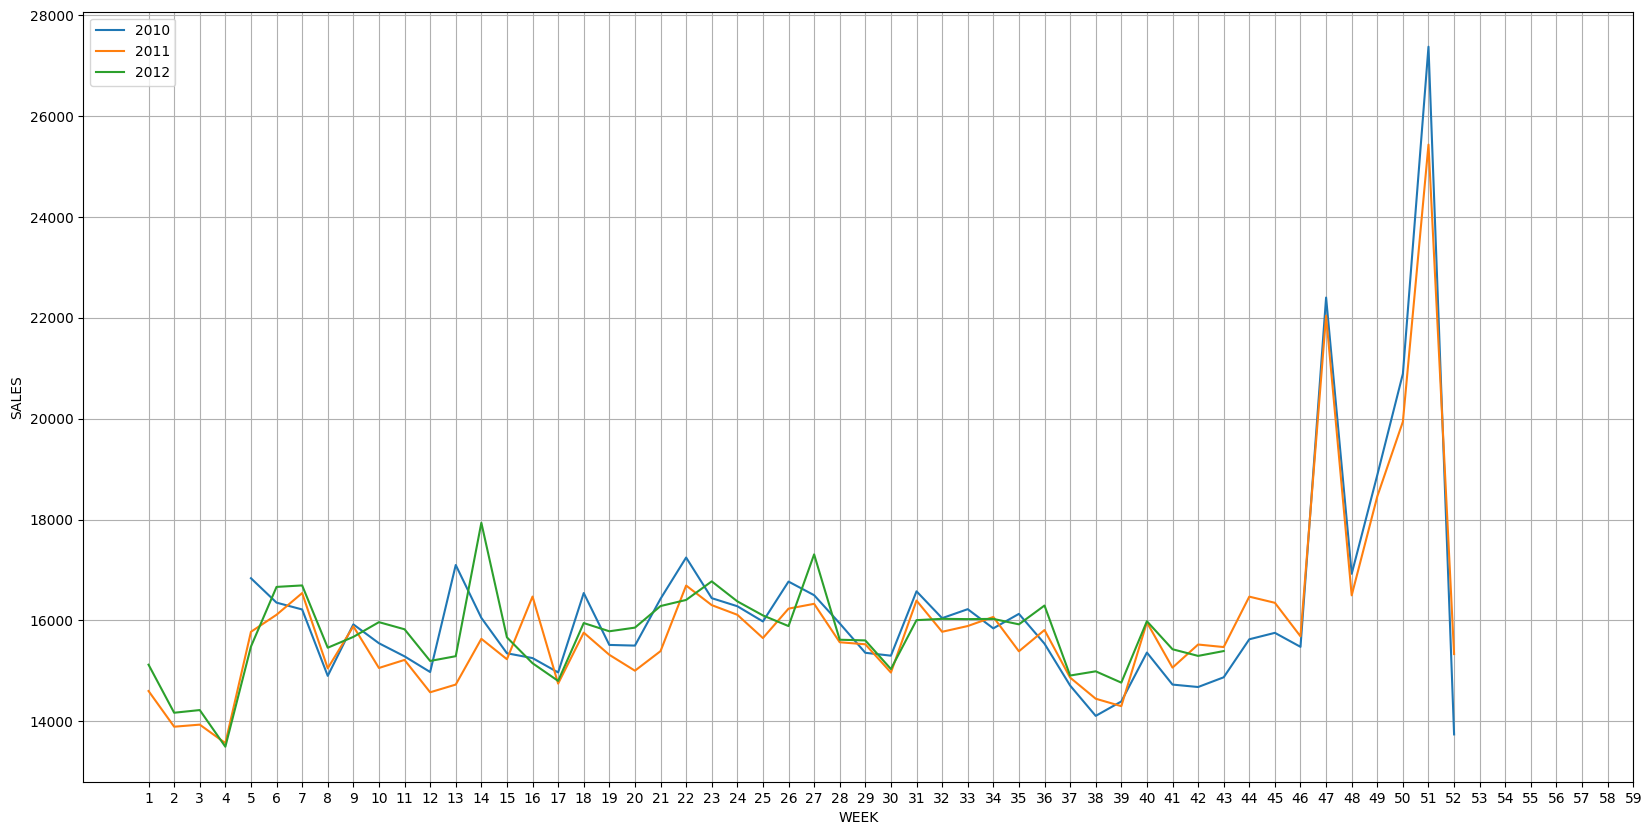

In [20]:
plt.figure(figsize=(20,10))
yearplt(2010)
yearplt(2011)
yearplt(2012)
plt.xlabel("WEEK")
plt.ylabel("SALES")
plt.grid()
plt.xticks(np.arange(1,60))
plt.legend([2010,2011,2012],loc="upper left")  

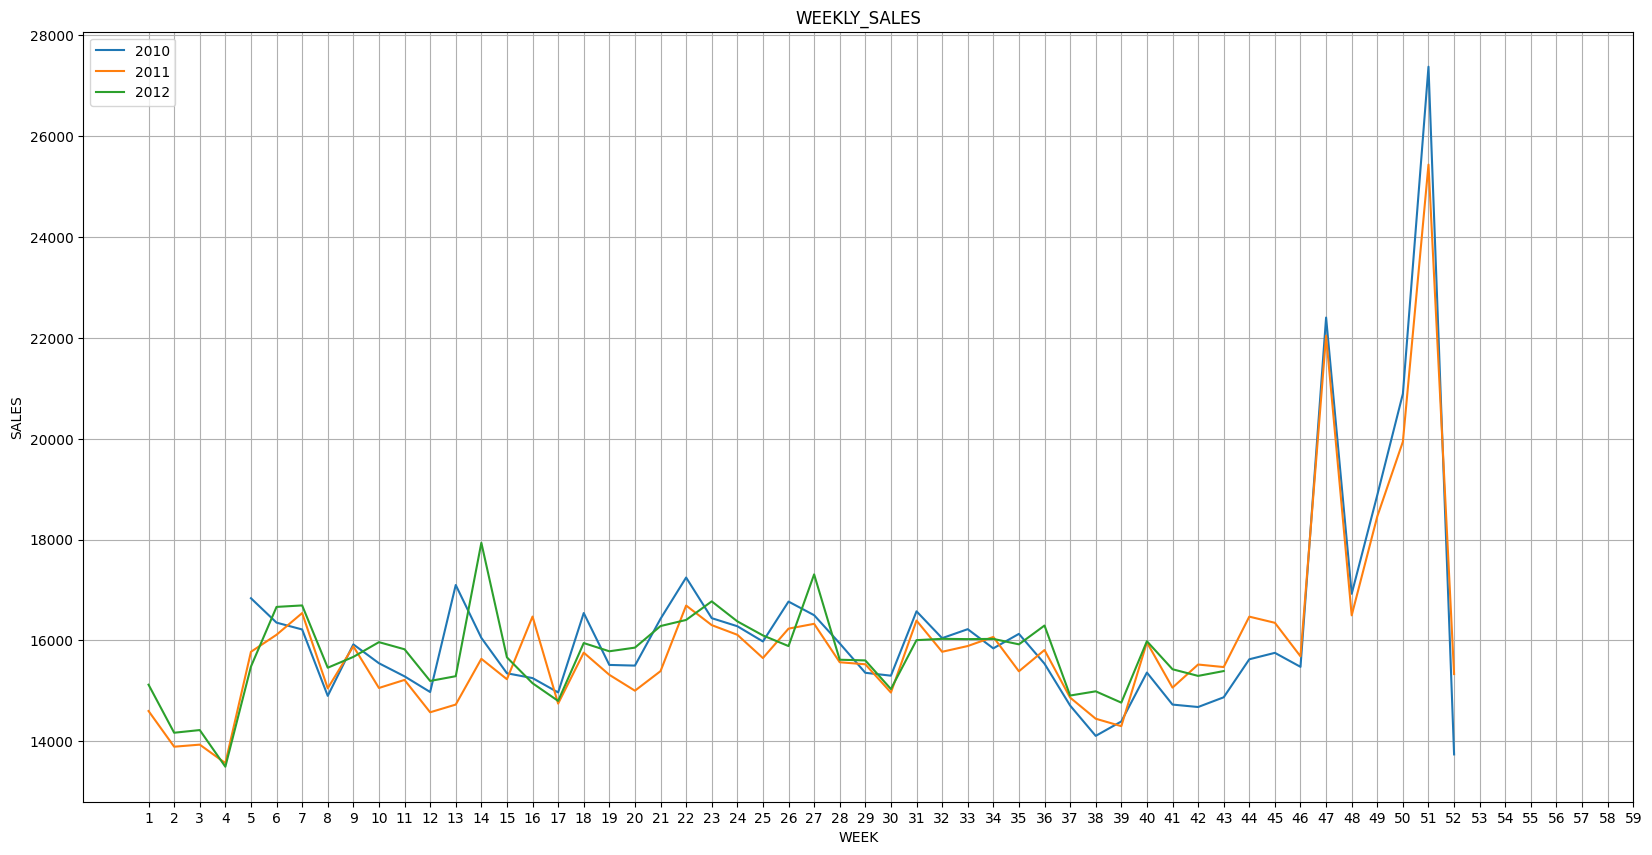

In [21]:
plt.figure(figsize=(20,10))
yearplt(2010)
yearplt(2011)
yearplt(2012)
plt.title("WEEKLY_SALES")
plt.xlabel("WEEK")
plt.ylabel("SALES")
plt.grid()
plt.xticks(np.arange(1,60))                       # gives the "xticks" values. Can also rotate the "xticks". Here, "xticks" --> "xlabels"/"xcoordinate"
plt.legend([2010,2011,2012],loc="upper left") 

<ipython-input-23-3b60623a1b32>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a["Weekly_Sales"],bins=100)


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

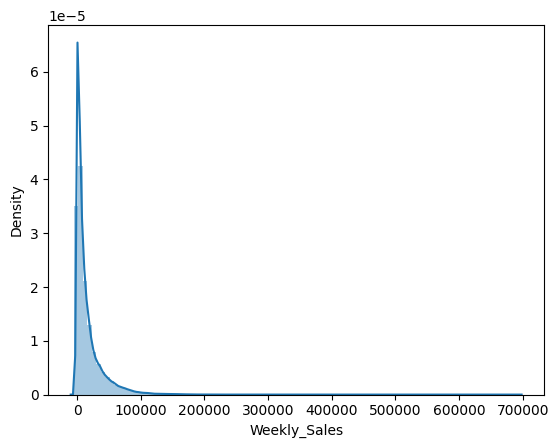

In [23]:
sns.distplot(a["Weekly_Sales"],bins=100)

<ipython-input-24-20cfc70a433c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a["Weekly_Sales"],kde=False,bins=100)


<Axes: xlabel='Weekly_Sales'>

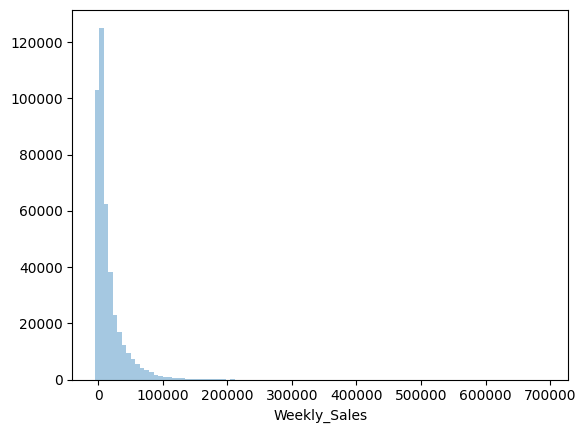

In [24]:
sns.distplot(a["Weekly_Sales"],kde=False,bins=100)

In [29]:
a

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,WEEK,YEAR
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010.0
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010.0
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010.0
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010.0
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,5.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012.0
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012.0
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012.0
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667,43.0,2012.0


In [33]:
a.groupby(["Store"])["Weekly_Sales"].mean()

Store
1     21710.543621
2     26898.070031
3      6373.033983
4     29161.210415
5      5053.415813
6     21913.243624
7      8358.766148
8     13133.014768
9      8772.890379
10    26332.303819
11    19276.762751
12    14867.308619
13    27355.136891
14    28784.851727
15     9002.493073
16     7863.224124
17    12954.393636
18    15733.313136
19    20362.126734
20    29508.301592
21    11283.435496
22    15181.218886
23    19776.180881
24    18969.106500
25    10308.157810
26    14554.129672
27    24826.984536
28    18714.889803
29     8158.810609
30     8764.237719
31    19681.907464
32    16351.621855
33     5728.414053
34    13522.081671
35    13803.596986
36     8584.412563
37    10297.355026
38     7492.478460
39    21000.763562
40    13763.632803
41    17976.004648
42    11443.370118
43    13415.114118
44     6038.929814
45    11662.897315
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

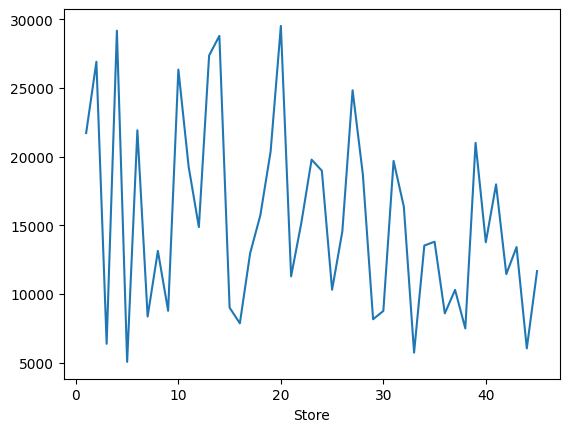

In [34]:
a.groupby(["Store"])["Weekly_Sales"].mean().plot(kind="line")

In [37]:
a.groupby(["Type"])["Weekly_Sales"].mean()

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Type'>

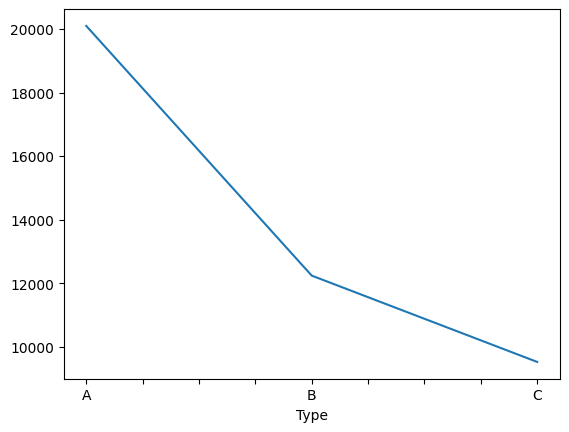

In [38]:
a.groupby(["Type"])["Weekly_Sales"].mean().plot(kind="line")

<Axes: xlabel='Store'>

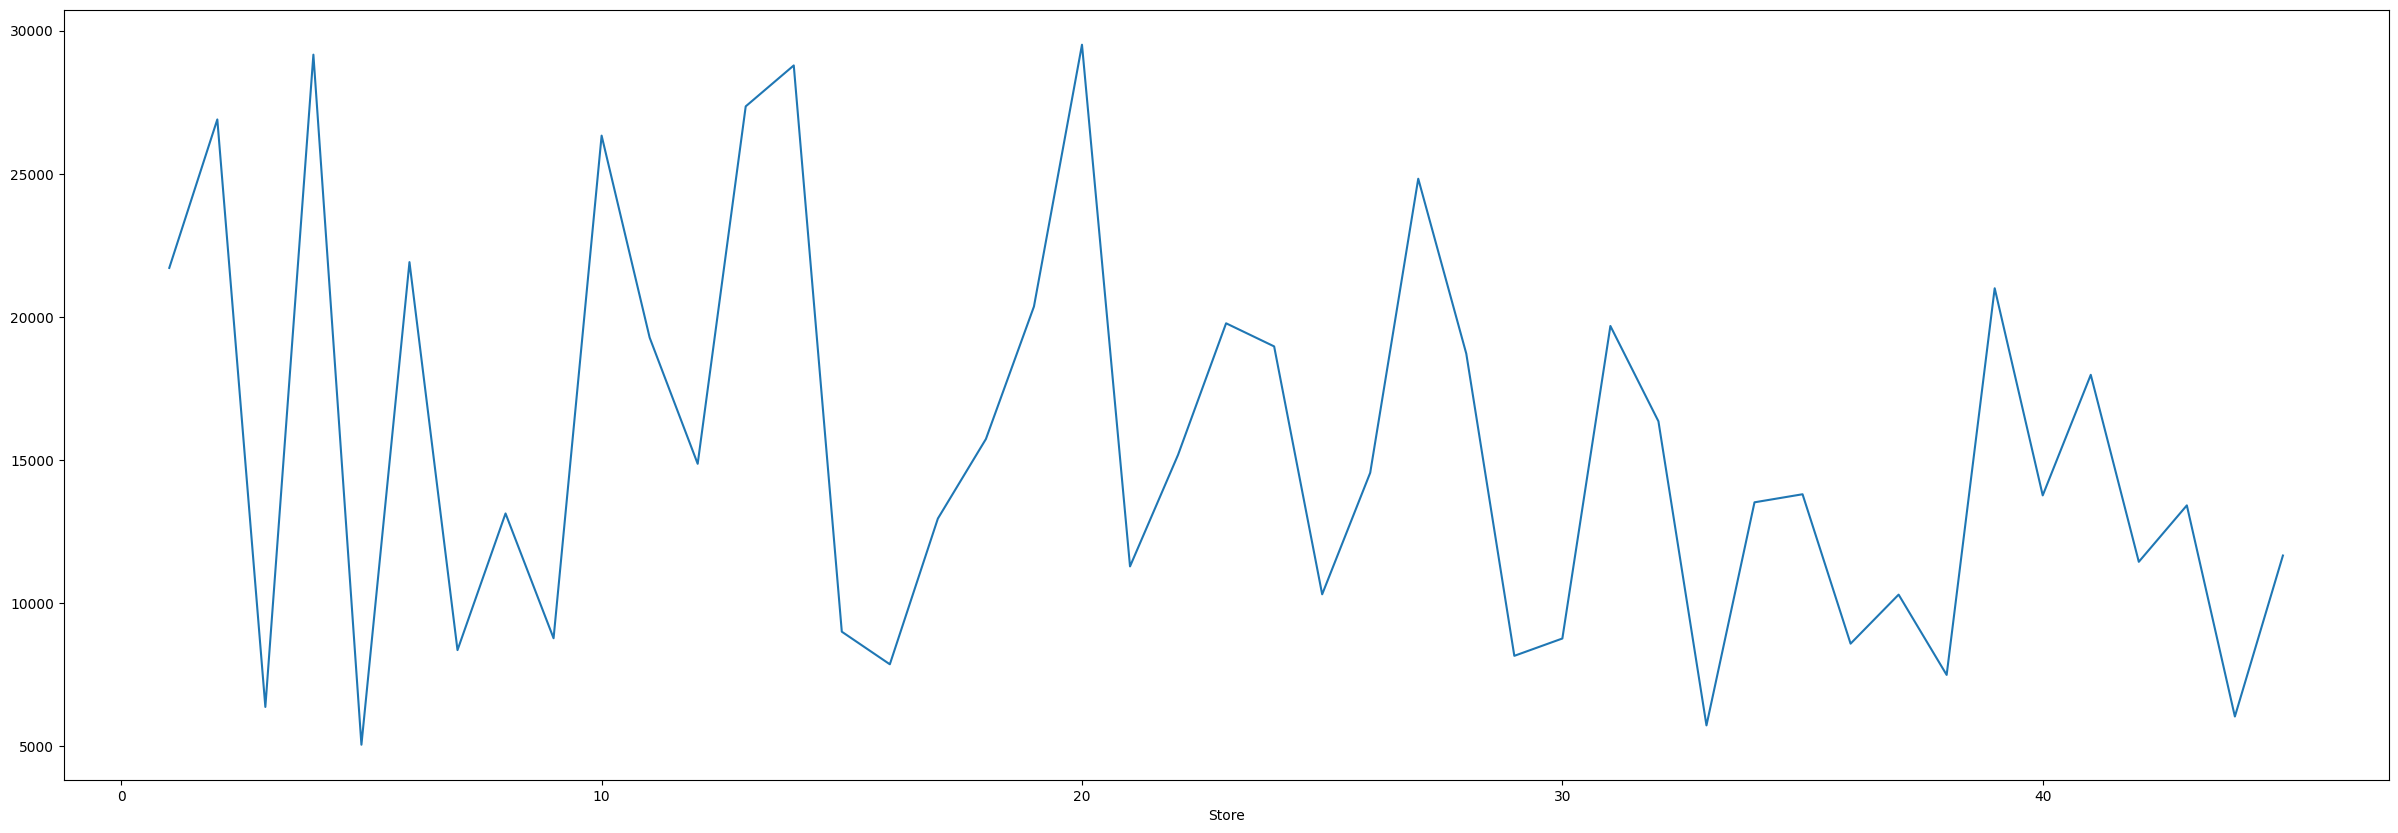

In [43]:
plt.figure(figsize=(30,10))
a.groupby(["Store"])["Weekly_Sales"].mean().plot(kind="line")

<ipython-input-44-2c2bace26265>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a["Weekly_Sales"],kde=False,bins=100,color="red")


<Axes: xlabel='Weekly_Sales'>

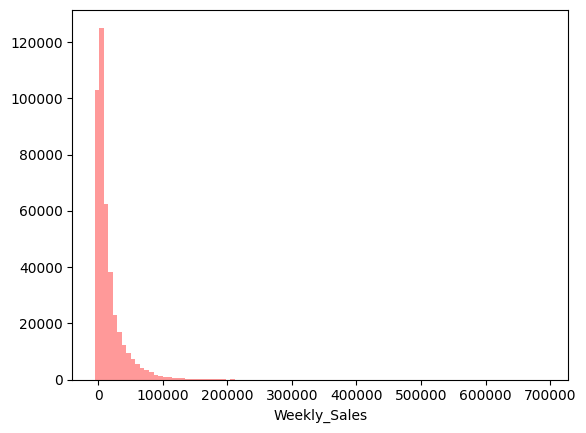

In [44]:
sns.distplot(a["Weekly_Sales"],kde=False,bins=100,color="red")

In [7]:
a.groupby(["Store"])["Weekly_Sales"].mean()

Store
1     21710.543621
2     26898.070031
3      6373.033983
4     29161.210415
5      5053.415813
6     21913.243624
7      8358.766148
8     13133.014768
9      8772.890379
10    26332.303819
11    19276.762751
12    14867.308619
13    27355.136891
14    28784.851727
15     9002.493073
16     7863.224124
17    12954.393636
18    15733.313136
19    20362.126734
20    29508.301592
21    11283.435496
22    15181.218886
23    19776.180881
24    18969.106500
25    10308.157810
26    14554.129672
27    24826.984536
28    18714.889803
29     8158.810609
30     8764.237719
31    19681.907464
32    16351.621855
33     5728.414053
34    13522.081671
35    13803.596986
36     8584.412563
37    10297.355026
38     7492.478460
39    21000.763562
40    13763.632803
41    17976.004648
42    11443.370118
43    13415.114118
44     6038.929814
45    11662.897315
Name: Weekly_Sales, dtype: float64

In [8]:
a.groupby(["Store"])["Weekly_Sales"].mean().reset_index()

,Store,Weekly_Sales
0,1,21710.543621
1,2,26898.070031
2,3,6373.033983
3,4,29161.210415
4,5,5053.415813
5,6,21913.243624
6,7,8358.766148
7,8,13133.014768
8,9,8772.890379
9,10,26332.303819


In [9]:
w = a.groupby(["Store"])["Weekly_Sales"].mean().reset_index()

In [11]:
w.sort_values("Weekly_Sales").style.bar(align="left")

,Store,Weekly_Sales
4,5,5053.415813
32,33,5728.414053
43,44,6038.929814
2,3,6373.033983
37,38,7492.478460
15,16,7863.224124
28,29,8158.810609
6,7,8358.766148
35,36,8584.412563
29,30,8764.237719


In [12]:
w.sort_values("Weekly_Sales")[["Weekly_Sales"]].style.bar(align="left")

,Weekly_Sales
4,5053.415813
32,5728.414053
43,6038.929814
2,6373.033983
37,7492.478460
15,7863.224124
28,8158.810609
6,8358.766148
35,8584.412563
29,8764.237719


In [13]:
w = w.set_index("Store")

In [14]:
w

,Weekly_Sales
Store,
1,21710.543621
2,26898.070031
3,6373.033983
4,29161.210415
5,5053.415813
6,21913.243624
7,8358.766148
8,13133.014768
9,8772.890379


In [16]:
w.sort_values("Weekly_Sales").style.bar(align="left")

,Weekly_Sales
Store,
5,5053.415813
33,5728.414053
44,6038.929814
3,6373.033983
38,7492.478460
16,7863.224124
29,8158.810609
7,8358.766148
36,8584.412563


<Axes: xlabel='Store'>

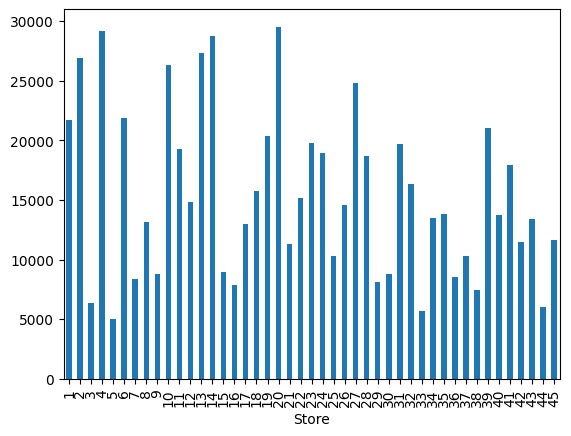

In [17]:
a.groupby(["Store"])["Weekly_Sales"].mean().plot(kind="bar")

In [20]:
def weekstr(x):
    sns.barplot(a.groupby([x])["Weekly_Sales"].mean().set_index(x).index,a.groupby([x])["Weekly_Sales"].mean().set_index(x).values,pallate="dark")

In [24]:
sns.barplot(x=w.index,y=w.values,pallate="dark")

ValueError: Data must be 1-dimensional, got ndarray of shape (45, 1) instead

In [25]:
w.values

array([[21710.54362066],
       [26898.07003126],
       [ 6373.03398296],
       [29161.21041472],
       [ 5053.41581287],
       [21913.24362354],
       [ 8358.76614833],
       [13133.01476806],
       [ 8772.89037893],
       [26332.30381871],
       [19276.76275094],
       [14867.30861927],
       [27355.13689135],
       [28784.85172709],
       [ 9002.49307343],
       [ 7863.22412369],
       [12954.39363646],
       [15733.31313622],
       [20362.12673433],
       [29508.30159193],
       [11283.43549572],
       [15181.21888625],
       [19776.1808806 ],
       [18969.1064998 ],
       [10308.15781008],
       [14554.12967221],
       [24826.98453594],
       [18714.88980322],
       [ 8158.8106092 ],
       [ 8764.2377194 ],
       [19681.90746401],
       [16351.62185454],
       [ 5728.41405272],
       [13522.08167058],
       [13803.59698573],
       [ 8584.41256348],
       [10297.35502637],
       [ 7492.47845966],
       [21000.76356246],
       [13763.63280323],


In [26]:
w.values.reshape(-1,)

array([21710.54362066, 26898.07003126,  6373.03398296, 29161.21041472,
        5053.41581287, 21913.24362354,  8358.76614833, 13133.01476806,
        8772.89037893, 26332.30381871, 19276.76275094, 14867.30861927,
       27355.13689135, 28784.85172709,  9002.49307343,  7863.22412369,
       12954.39363646, 15733.31313622, 20362.12673433, 29508.30159193,
       11283.43549572, 15181.21888625, 19776.1808806 , 18969.1064998 ,
       10308.15781008, 14554.12967221, 24826.98453594, 18714.88980322,
        8158.8106092 ,  8764.2377194 , 19681.90746401, 16351.62185454,
        5728.41405272, 13522.08167058, 13803.59698573,  8584.41256348,
       10297.35502637,  7492.47845966, 21000.76356246, 13763.63280323,
       17976.0046481 , 11443.37011793, 13415.11411791,  6038.92981448,
       11662.89731452])

In [27]:
sns.barplot(x=w.index,y=w.values,pallate="dark")

ValueError: Data must be 1-dimensional, got ndarray of shape (45, 1) instead

<Axes: xlabel='Store'>

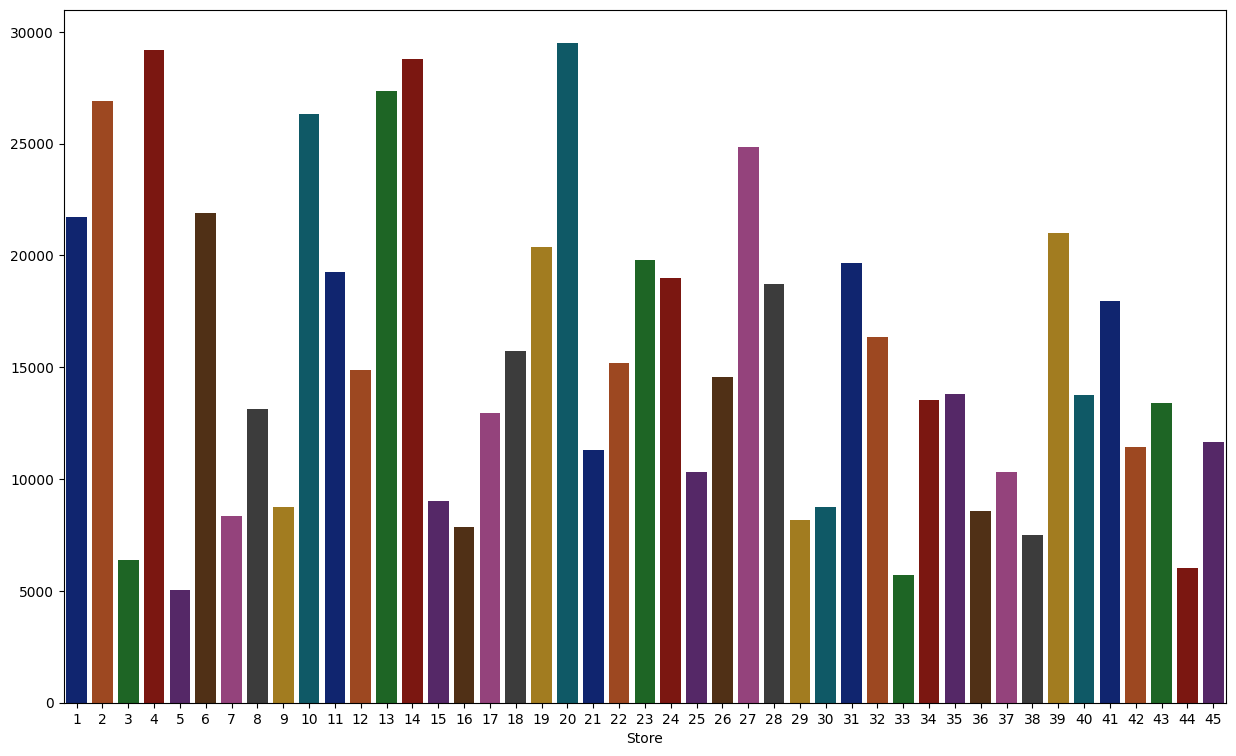

In [31]:
plt.figure(figsize=(15,9))
sns.barplot(x=w.index,y=w.values.reshape(-1,),palette="dark") 

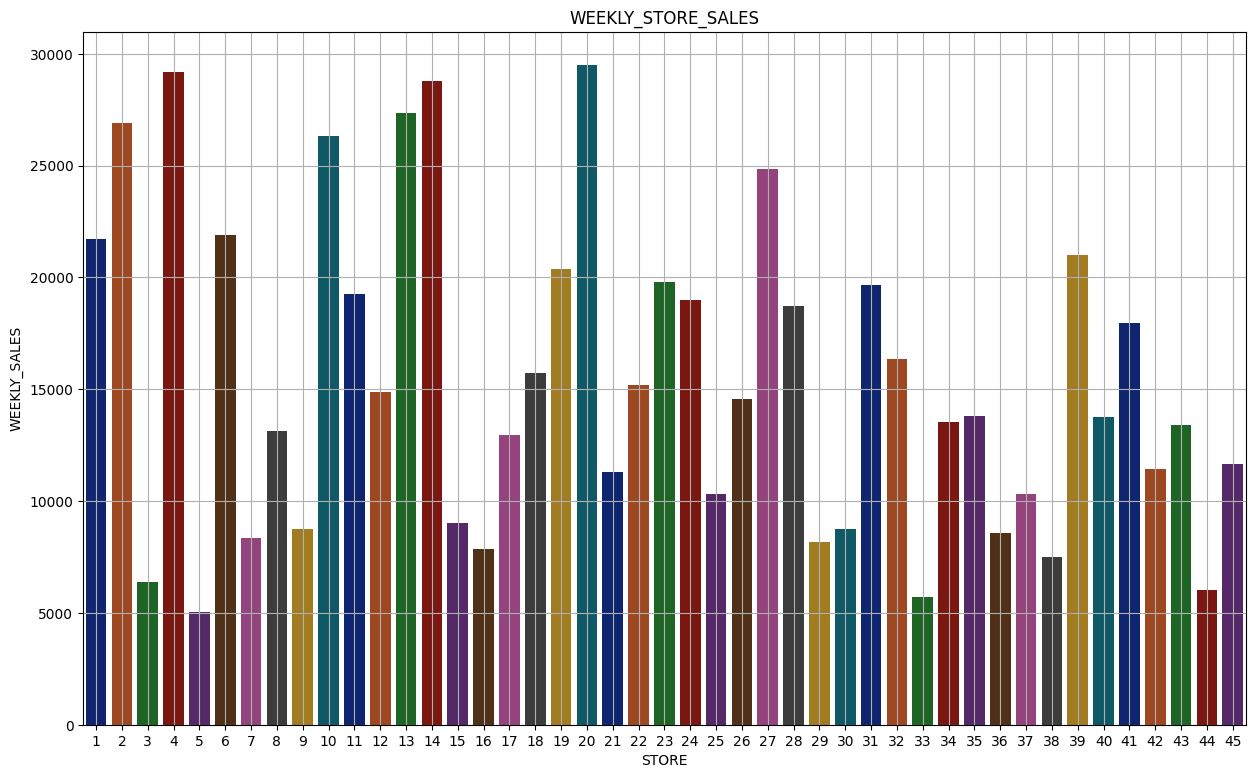

In [32]:
plt.figure(figsize=(15,9))
sns.barplot(x=w.index,y=w.values.reshape(-1,),palette="dark")   # got data structure error
plt.title("WEEKLY_STORE_SALES")
plt.xlabel("STORE")
plt.ylabel("WEEKLY_SALES")
plt.grid()

In [35]:
d = a.groupby(["Dept"])["Weekly_Sales"].mean().reset_index()

In [36]:
d.set_index("Dept")

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515
...,...
95,69824.423080
96,15210.942761
97,14255.576919


In [37]:
d = d.set_index("Dept")

In [39]:
d.sort_values("Weekly_Sales").style.bar(align="left")

,Weekly_Sales
Dept,
47,-7.682554
43,1.193333
78,7.296638
39,11.123750
51,21.931729
45,23.211586
54,108.305985
77,328.961800
60,347.370229


In [43]:
d = d.reset_index()

In [44]:
d.sort_values("Weekly_Sales").style.bar(align="left")

,Dept,Weekly_Sales
45,47,-7.682554
41,43,1.193333
63,78,7.296638
37,39,11.123750
49,51,21.931729
43,45,23.211586
51,54,108.305985
62,77,328.961800
56,60,347.370229
80,99,415.487065


In [56]:
plt.figure(figsize=(15,9))
sns.barplot(x=d.index,y=d.values.reshape(-1,),palette="dark")   # got data structure error
plt.title("WEEKLY_DEPT_SALES")
plt.xlabel("DEPT")
plt.ylabel("WEEKLY_SALES")
plt.grid()

ValueError: Grouper and axis must be same length

<Figure size 1500x900 with 0 Axes>

In [57]:
d = d.set_index("Dept")

In [58]:
d

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515
...,...
95,69824.423080
96,15210.942761
97,14255.576919


In [59]:
d.values

array([[ 1.92134851e+04],
       [ 4.36070201e+04],
       [ 1.17936985e+04],
       [ 2.59746302e+04],
       [ 2.13655835e+04],
       [ 4.74785619e+03],
       [ 2.41612374e+04],
       [ 3.01912635e+04],
       [ 2.02066819e+04],
       [ 1.83212724e+04],
       [ 1.45056382e+04],
       [ 4.17539702e+03],
       [ 3.06638026e+04],
       [ 1.48709660e+04],
       [ 1.42456383e+04],
       [ 1.01871205e+04],
       [ 7.33694354e+03],
       [ 1.65481503e+03],
       [ 5.52878732e+03],
       [ 4.98285083e+03],
       [ 1.07745097e+04],
       [ 2.39314740e+04],
       [ 6.35360456e+03],
       [ 8.98823082e+03],
       [ 7.64941795e+03],
       [ 1.58343773e+03],
       [ 6.18085116e+02],
       [ 5.65365532e+03],
       [ 4.11819721e+03],
       [ 2.33944029e+03],
       [ 6.83327079e+03],
       [ 6.47197958e+03],
       [ 1.56259154e+04],
       [ 2.92104495e+03],
       [ 2.02257106e+03],
       [ 3.11107619e+03],
       [ 6.10906196e+04],
       [ 1.11237500e+01],
       [ 4.4

In [60]:
d.values.reshape(-1,)

array([ 1.92134851e+04,  4.36070201e+04,  1.17936985e+04,  2.59746302e+04,
        2.13655835e+04,  4.74785619e+03,  2.41612374e+04,  3.01912635e+04,
        2.02066819e+04,  1.83212724e+04,  1.45056382e+04,  4.17539702e+03,
        3.06638026e+04,  1.48709660e+04,  1.42456383e+04,  1.01871205e+04,
        7.33694354e+03,  1.65481503e+03,  5.52878732e+03,  4.98285083e+03,
        1.07745097e+04,  2.39314740e+04,  6.35360456e+03,  8.98823082e+03,
        7.64941795e+03,  1.58343773e+03,  6.18085116e+02,  5.65365532e+03,
        4.11819721e+03,  2.33944029e+03,  6.83327079e+03,  6.47197958e+03,
        1.56259154e+04,  2.92104495e+03,  2.02257106e+03,  3.11107619e+03,
        6.10906196e+04,  1.11237500e+01,  4.49007027e+04,  1.96556000e+03,
        5.18970342e+03,  1.19333333e+00,  4.65172966e+03,  2.32115857e+01,
        1.99447415e+04, -7.68255418e+00,  1.34489358e+03,  8.15995130e+03,
        2.65889701e+03,  2.19317288e+01,  1.92835625e+03,  1.08305985e+02,
        1.07166646e+04,  

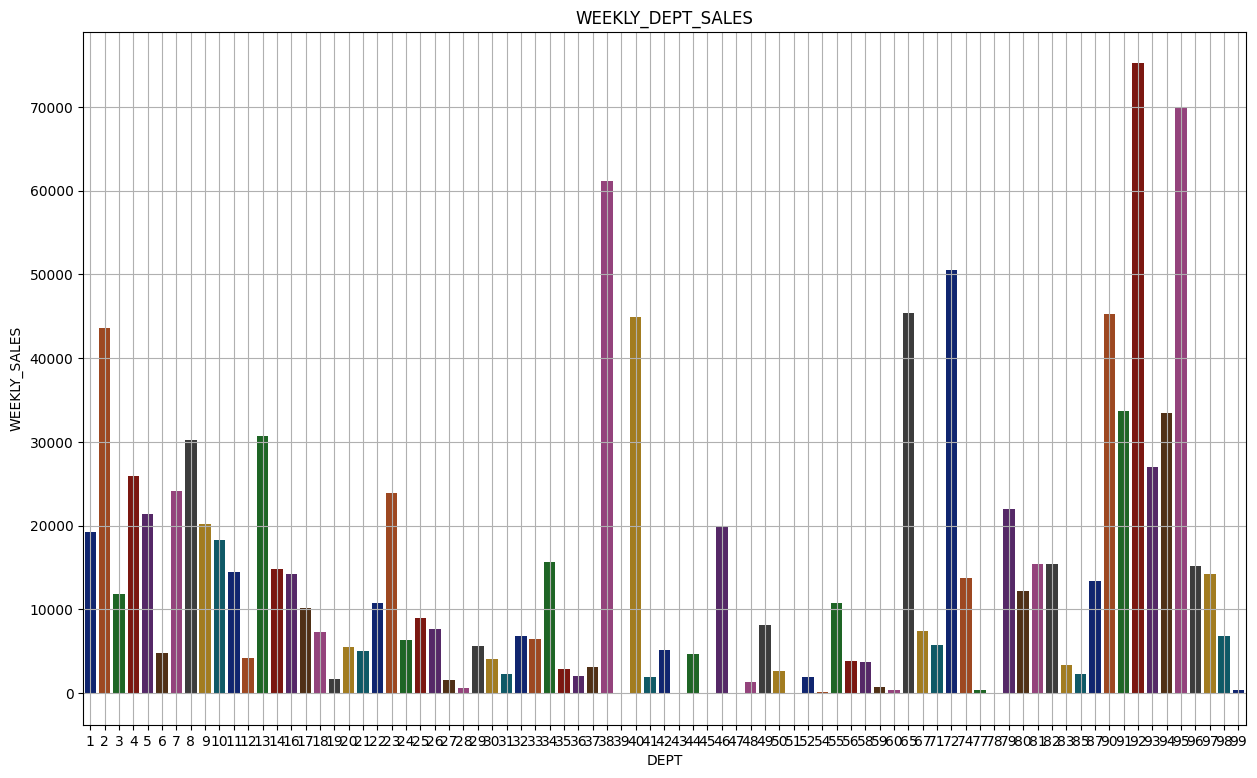

In [61]:
plt.figure(figsize=(15,9))
sns.barplot(x=d.index,y=d.values.reshape(-1,),palette="dark")   # got data structure error
plt.title("WEEKLY_DEPT_SALES")
plt.xlabel("DEPT")
plt.ylabel("WEEKLY_SALES")
plt.grid()

In [62]:
sns.heatmap(a.corr())

ValueError: could not convert string to float: 'A'

In [63]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  WEEK          421570 non-null  float64       
 12  YEAR          421570 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 39.0+ MB


<Axes: >

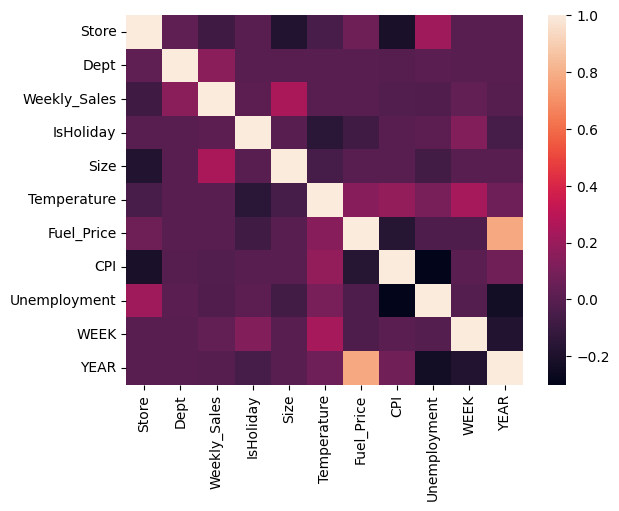

In [65]:
sns.heatmap(a[["Store","Dept","Weekly_Sales","IsHoliday","Size","Temperature","Fuel_Price","CPI","Unemployment","WEEK","YEAR"]].corr())

<Axes: >

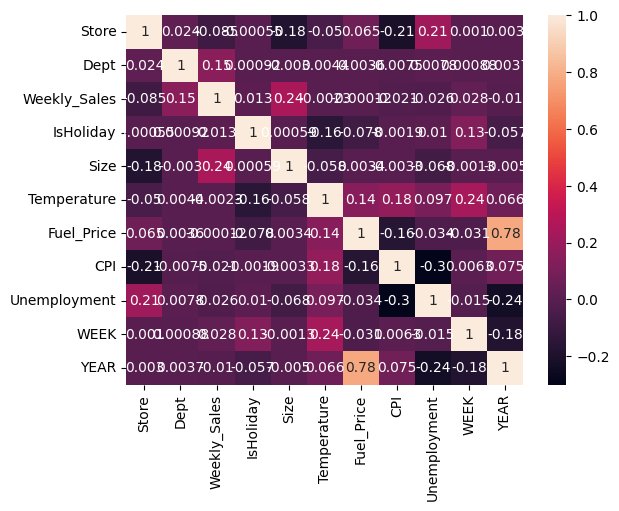

In [66]:
sns.heatmap(a[["Store","Dept","Weekly_Sales","IsHoliday","Size","Temperature","Fuel_Price","CPI","Unemployment","WEEK","YEAR"]].corr(),annot=True)

<Axes: >

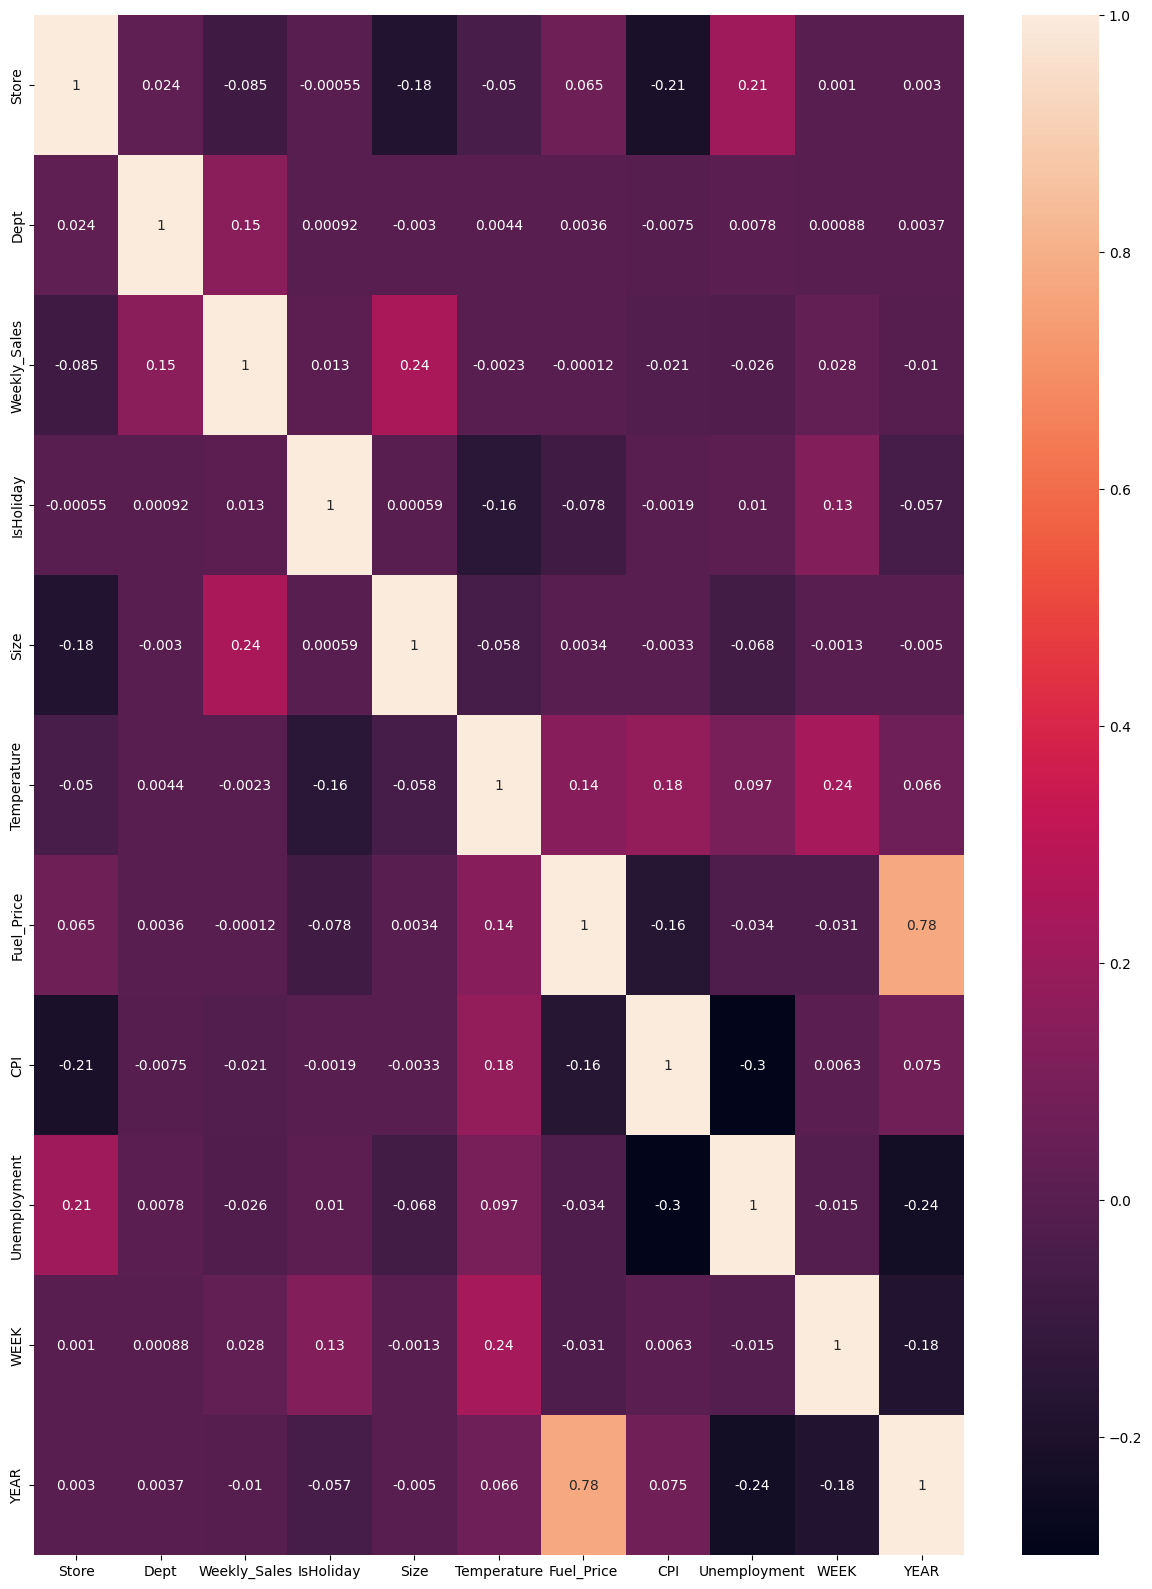

In [67]:
plt.figure(figsize=(15,20))
sns.heatmap(a[["Store","Dept","Weekly_Sales","IsHoliday","Size","Temperature","Fuel_Price","CPI","Unemployment","WEEK","YEAR"]].corr(),annot=True)

<Axes: xlabel='Type'>

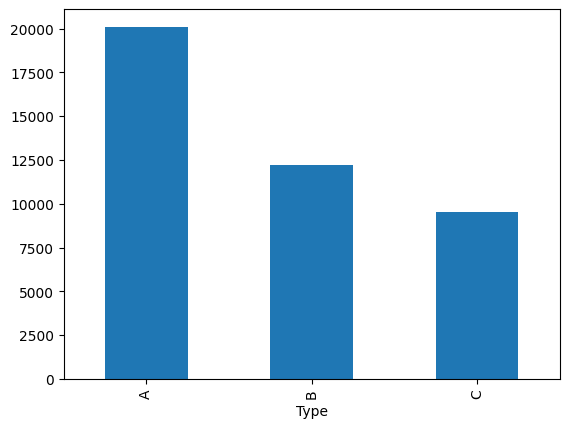

In [69]:
a.groupby(["Type"])["Weekly_Sales"].mean().plot(kind="bar")

<Axes: xlabel='Type', ylabel='Size'>

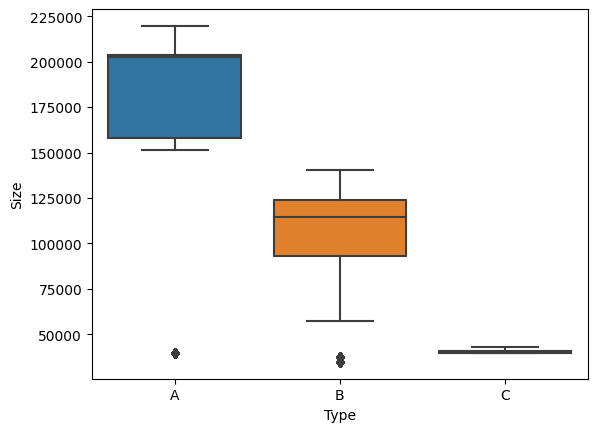

In [70]:
sns.boxplot(x=a["Type"],y=a["Size"],data=a)

<Axes: xlabel='YEAR'>

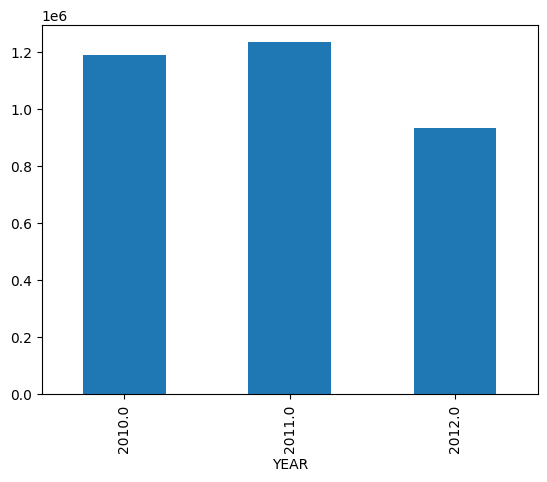

In [73]:
a.groupby(["YEAR"])["Unemployment"].sum().plot(kind="bar")

<Axes: xlabel='YEAR'>

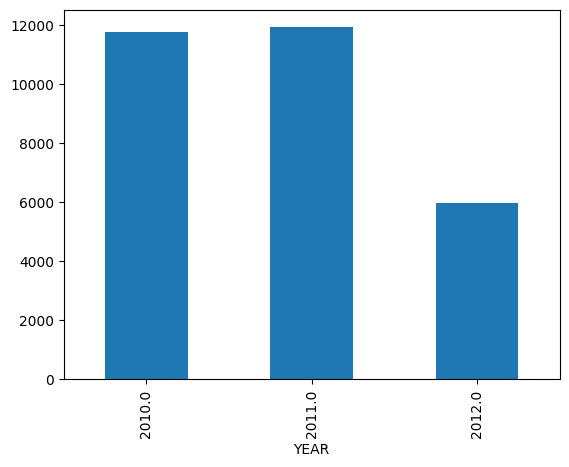

In [75]:
a.groupby(["YEAR"])["IsHoliday"].sum().plot(kind="bar")

In [78]:
a["Temperature"].value_counts()

Temperature
50.43    709
67.87    646
72.62    594
76.67    583
70.28    563
        ... 
56.50     41
55.47     40
58.40     40
66.79     39
64.09     38
Name: count, Length: 3528, dtype: int64